In [1]:
#참고 블로그*
#https://banana-media-lab.tistory.com/entry/Librosa-python-library%EB%A1%9C-%EC%9D%8C%EC%84%B1%ED%8C%8C%EC%9D%BC-%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0


#1. 음악 데이터 파일 로드에 필요한 라이브러리 
import IPython.display
import pandas as pd

# 음악 분석 라이브러리
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
#2. 피아노 음계 정보 파일 불러오기
# piano_inform.csv 

origin_pitch=pd.read_csv('piano_inform.csv')

display(origin_pitch)

,ID,Format,Path
0,do,mp3,piano/do.mp3
1,do_sharp,mp3,piano/do_sharp.mp3
2,re,mp3,piano/re.mp3
3,re_sharp,mp3,piano/re_sharp.mp3
4,mi,mp3,piano/mi.mp3
5,fa,mp3,piano/fa.mp3
6,fa_sharp,mp3,piano/fa_sharp.mp3
7,sol,mp3,piano/sol.mp3
8,ra,mp3,piano/ra.mp3
9,ra_sharp,mp3,piano/ra_sharp.mp3


In [3]:
#3. 분석에 필요한 열만 추출 : pitch_data
#ID, Path

pitch_data=origin_pitch[['ID','Path']]

display(pitch_data)

,ID,Path
0,do,piano/do.mp3
1,do_sharp,piano/do_sharp.mp3
2,re,piano/re.mp3
3,re_sharp,piano/re_sharp.mp3
4,mi,piano/mi.mp3
5,fa,piano/fa.mp3
6,fa_sharp,piano/fa_sharp.mp3
7,sol,piano/sol.mp3
8,ra,piano/ra.mp3
9,ra_sharp,piano/ra_sharp.mp3


ID                do
Path    piano/do.mp3
Name: 0, dtype: object piano/do.mp3


c:\users\yeongeun\appdata\local\programs\python\python38-32\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


[0.37291306, 0.3004133, 0.36021164, 0.35095412, 0.3323774, 0.30949786, 0.27150342, 0.3478579, 0.2710341, 0.5568042, 0.8232495, 1.0]
[0.99204093, 1.0, 0.94247377, 0.85047776, 0.7370426, 0.6175289, 0.54927266, 0.5631537, 0.6288978, 0.72769046, 0.8470922, 0.9001422]
[1.0, 0.8996528, 0.57686347, 0.28212953, 0.11529444, 0.081677556, 0.07419774, 0.08800002, 0.1499982, 0.26352677, 0.5373406, 0.76187044]
[1.0, 0.7351861, 0.3028178, 0.04223288, 0.014175536, 0.008661144, 0.008014665, 0.0091109155, 0.0125243375, 0.05713042, 0.24185438, 0.58399826]
[1.0, 0.63965875, 0.22612762, 0.011942361, 0.00020827181, 2.664378e-05, 2.4727431e-05, 7.072632e-05, 0.0011421427, 0.024891455, 0.13717589, 0.5147045]
[1.0, 0.6394277, 0.22599594, 0.011941194, 0.00020756527, 2.4429208e-05, 2.078301e-05, 6.514794e-05, 0.0011315352, 0.024850644, 0.13703416, 0.5146174]
[1.0, 0.6394647, 0.2260179, 0.01194287, 0.00020741558, 2.445123e-05, 2.0926429e-05, 6.539375e-05, 0.0011314019, 0.024848305, 0.13702421, 0.5146075]
[1.0, 0.

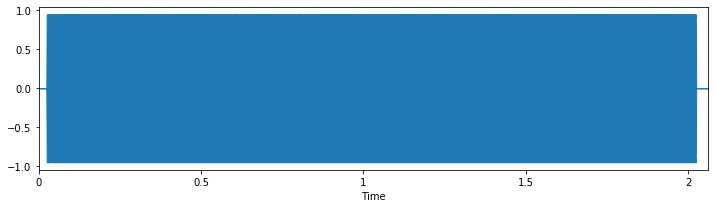

In [4]:
#4-0. 낮은 도의 chromagram
pitch_name=pitch_data.loc[0]
pitch_path=pitch_name[1]

print(pitch_name, pitch_path)

y,sr=librosa.load(pitch_path,sr=44100)
IPython.display.Audio(data=y,rate=sr)


#음악 plot : x축-time, y축-amplitude
plt.figure(figsize=(12,3))
librosa.display.waveplot(y,sr=44100,x_axis='time')

#크로마그램 추출
chroma_stft=librosa.feature.chroma_stft(y=y,sr=sr)

for i in range(len(chroma_stft)):
    info=[]
    for j in range(12):
        info.append(chroma_stft[j][i])
    print(info)

ID                do_sharp
Path    piano/do_sharp.mp3
Name: 1, dtype: object piano/do_sharp.mp3
[0.40372303, 0.47489074, 0.20663059, 0.5756533, 0.6833254, 0.52788097, 1.0, 0.47942847, 0.49252954, 0.49941942, 0.60960245, 0.7102592]
[0.93018967, 1.0, 0.9943101, 0.91615427, 0.8125041, 0.66961336, 0.56196713, 0.5078017, 0.5541703, 0.61670357, 0.7490896, 0.8307386]
[0.7945746, 1.0, 0.8158635, 0.48118886, 0.2033378, 0.088424295, 0.071877465, 0.06803211, 0.08223342, 0.13134883, 0.27152422, 0.52056926]
[0.5990474, 1.0, 0.5966387, 0.20066023, 0.020850508, 0.009895573, 0.007402879, 0.0071675526, 0.009570799, 0.013503899, 0.041451707, 0.2680458]
[0.4931003, 1.0, 0.4995137, 0.1219619, 0.0046721916, 3.3034852e-05, 4.026205e-06, 4.7825e-06, 1.3958006e-05, 0.00023404599, 0.015147023, 0.18133728]
[0.49248078, 1.0, 0.49946654, 0.121890664, 0.004652643, 2.998088e-05, 4.2969277e-06, 4.404896e-06, 1.4360691e-05, 0.0002392684, 0.015125298, 0.18090332]
[0.4924618, 1.0, 0.49945793, 0.1218848, 0.0046534385, 3

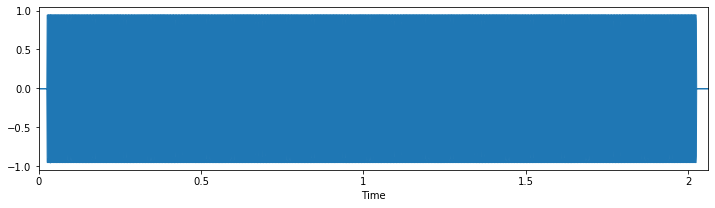

In [5]:
#4-1. 도샵의 chromagram
pitch_name=pitch_data.loc[1]
pitch_path=pitch_name[1]

print(pitch_name, pitch_path)

y,sr=librosa.load(pitch_path,sr=44100)
IPython.display.Audio(data=y,rate=sr)


#음악 plot : x축-time, y축-amplitude
plt.figure(figsize=(12,3))
librosa.display.waveplot(y,sr=44100,x_axis='time')

#크로마그램 추출
chroma_stft=librosa.feature.chroma_stft(y=y,sr=sr)

for i in range(len(chroma_stft)):
    info=[]
    for j in range(12):
        info.append(chroma_stft[j][i])
    print(info)

ID                re
Path    piano/re.mp3
Name: 2, dtype: object piano/re.mp3
[0.27317184, 0.49099422, 0.2305728, 0.7066999, 1.0, 0.9232251, 0.8444513, 0.29587772, 0.19796672, 0.3273213, 0.458193, 0.2641579]
[0.8301588, 0.94443274, 1.0, 0.97211814, 0.8972497, 0.75851333, 0.6156869, 0.4985792, 0.48277184, 0.5056138, 0.61923987, 0.721121]
[0.49718934, 0.8575816, 1.0, 0.7822421, 0.42981133, 0.15732875, 0.078672886, 0.06509367, 0.064837866, 0.07569353, 0.11928677, 0.26867607]
[0.23190038, 0.72848284, 1.0, 0.5824078, 0.14427547, 0.016568966, 0.008434056, 0.0069944216, 0.006718706, 0.008161122, 0.014909811, 0.04670802]
[0.16987114, 0.64979595, 1.0, 0.5240128, 0.06956231, 0.0028847547, 0.00012827646, 3.534458e-05, 3.8390663e-05, 0.000117009324, 0.0008328014, 0.0101538915]
[0.16970395, 0.64907795, 1.0, 0.5240126, 0.06943183, 0.0028547398, 0.00011777135, 3.1173557e-05, 3.735015e-05, 0.00011771443, 0.0008395094, 0.010188178]
[0.16967277, 0.6490186, 1.0, 0.52403295, 0.069444135, 0.002857145, 0.00

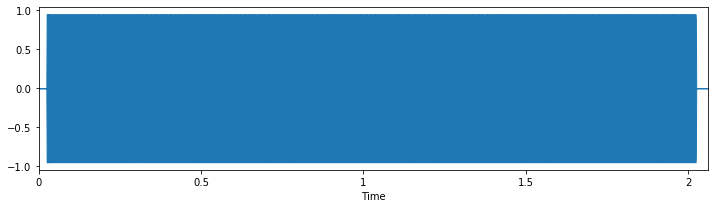

In [6]:
#4-2. 레의 chromagram
pitch_name=pitch_data.loc[2]
pitch_path=pitch_name[1]

print(pitch_name, pitch_path)

y,sr=librosa.load(pitch_path,sr=44100)
IPython.display.Audio(data=y,rate=sr)


#음악 plot : x축-time, y축-amplitude
plt.figure(figsize=(12,3))
librosa.display.waveplot(y,sr=44100,x_axis='time')

#크로마그램 추출
chroma_stft=librosa.feature.chroma_stft(y=y,sr=sr)

for i in range(len(chroma_stft)):
    info=[]
    for j in range(12):
        info.append(chroma_stft[j][i])
    print(info)